# Candidates Countris for EU membership

The Europian Union consits of 28 member coutries (https://en.wikipedia.org/wiki/Member_state_of_the_European_Union#List). 
On the other hand, we still have European states that aren't members and they are on the road to EU membership. In alphabetical order, those coutries are:

1. Albania
2. (The former Yugoslav Republic of) Macedonia
3. Montenegro
4. Serbia
5. Turkey

In my research I also included Croatia because it is the latest land which was accepted in Union. It can be useful for better understanding and analisys when it comes about candidate countries.
I was interested in development of these states for last fifteen years, so I found out appropriate dataset on www.kaggle.com and started to exploring it. In this project I was working with the latest dataset, which is available on http://www.worldbank.org/en/publication/wdr/wdr-archive

Table of content:
1. Data Preparation
2. Birth Rate, Population and Unemployment
3. Electricity consumption and CO2 Emission
4. Business and Agriculture
5. Net bilateral aid flows from donors
6. Women position in society
7. Conclusion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7.0, 4.5)
plt.rcParams['font.size'] = 9
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Preparation

In [16]:
f = pd.read_csv('C:\\Users\\madza\\Desktop\\WDI_csv\\WDI_Data.csv', encoding='windows-1251')
f.rename(columns={'Country Name': 'CountryName', 'Country Code': 'CountryCode', 'Indicator Name': 'IndicatorName', 'Indicator Code': 'IndicatorCode'}, inplace=True)

country = ['Albania', 'Croatia', 'European Union', 'Macedonia, FYR', 'Montenegro', 'Serbia', 'Turkey']
df = f.loc[f.CountryName.isin(country)].copy()
df.loc[df.CountryName == 'Macedonia, FYR', 'CountryName'] = 'Macedonia'
df.loc[df.CountryName == 'European Union', 'CountryName'] = 'EUU'

colors = {'Albania': '#348ABD',
          'Croatia': '#9E95D6',
          'EUU': '#777777',
          'Macedonia': '#E24D37',
          'Montenegro': '#64C1A4',
          'Serbia': '#FBC15E',
          'Turkey': '#8EBA42'}

columns = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode']
df2 = pd.melt(df, id_vars=columns, var_name='Year', value_name='Value')
df2.dropna(inplace=True)

df2['Year'] = df2['Year'].astype(int)
df2 = df2.loc[df2.Year.isin(range(2000,2017))]

def plot_aid(indicators):
    col = ['CountryName', 'IndicatorName', 'IndicatorCode', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    ind_stacked = df.loc[df.CountryName != 'EUU']
    ind_stacked = ind_stacked[col]
    
    ind_stacked = ind_stacked.fillna(0)
    label = []
    
    for key, color in colors.items():
        if key == 'EUU':
            continue
        label.append(key)
    label.sort()
        
    for indicator in indicators:
        ind_code = ind_stacked.loc[ind_stacked.IndicatorCode == indicator]
        
        index = np.arange(len(col[3:])) + 0.3
        bar_width = 0.8
        y_offset = np.array([0.0] * len(col[3:]))
        
        l = np.arange(len(ind_code)) #df length
        cl = np.arange(len(col[3:])) #column length
        years = []
        for j in cl:
            years.append(col[j+3])
            for i in l:
                c = colors[ind_code['CountryName'].iloc[i]]
                value = ind_code.iloc[i,j+3]/10000
                plt.bar(index[j], value, bar_width, bottom=y_offset[j], color=c)
                y_offset[j] += value
                plt.xticks(np.arange(len(col[3:])) + 0.6, years, rotation=90, horizontalalignment='left')
            title = ind_code['IndicatorName'].iloc[i]
        plt.title(title)
        plt.legend(label, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.grid(b=None, which='major', axis='x')
        plt.show()
        

def plot_ind(indicators):
    l = len(indicators)
    for indicator in indicators:
        fig, ax = plt.subplots()
        ind_code = df2.loc[df2.IndicatorCode == indicator]
        ind_name_country = ind_code.groupby(['IndicatorName', 'CountryName'])
        for name, values in ind_name_country:   
            ax.plot(values['Year'], values['Value'], label=name[1], color = colors[name[1]], linewidth = 2) 
            title = name[0]
            co2 = '(% of total fuel combustion)'
            if len(title) > 57 and co2 in title:
                ind = title.rfind(co2)
                title = title[0:ind]
            ax.set_title(title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
        plt.tick_params(axis='x', which='both', bottom='on', top='off')        
        plt.tick_params(axis='y', which='both', left='on', right='off')
        plt.tight_layout()
        plt.show()  

## Birth Rate

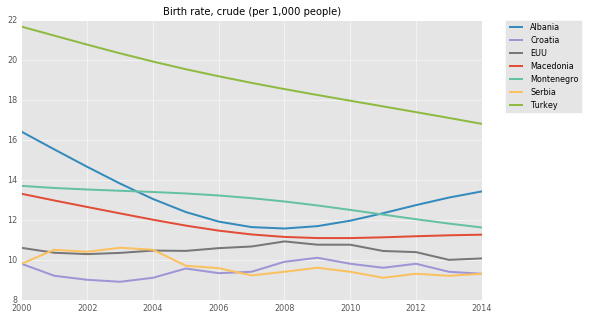

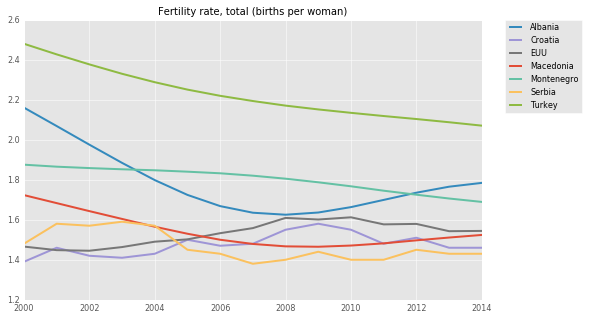

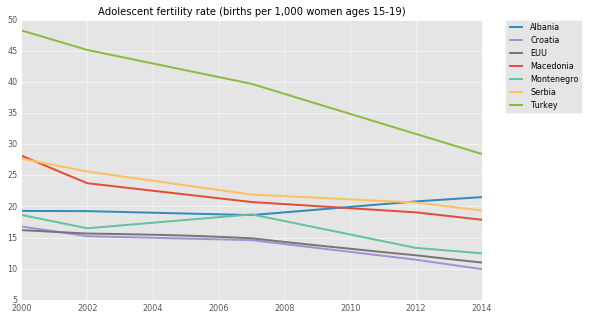

In [9]:
fertility_rate = ['SP.DYN.CBRT.IN', #Birth rate, crude (per 1,000 people)
                  'SP.DYN.TFRT.IN', #Fertility rate, total (births per woman)
                  'SP.ADO.TFRT'     #Adolescent fertility rate (births per 1,000 women ages 15-19)
                 ]
plot_ind(fertility_rate)

Statistics for birth and fertility rates, is generaly very delicate for most countries in the world. These three diagrams represent nowadays situation world wide. It's obvious that birth and fertility rates are in decrease for all countries that are used for exploration. At first we can see that Turkey and Montenegro have these rates higher than EU avarage but also data for Albania showing increasing for few last years. On the contrary, all other countries are around or even below EU average. Secondly, diagram for Adolescent fertility rate is worrying for all states, especially in Turkey.

# # Population

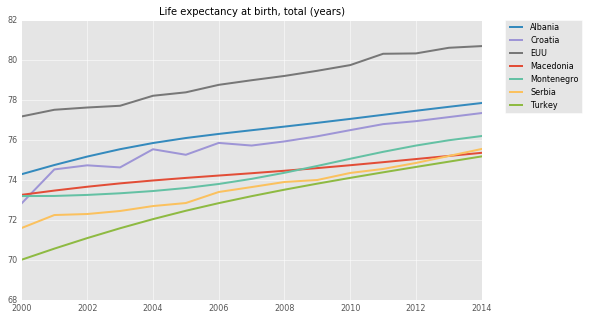

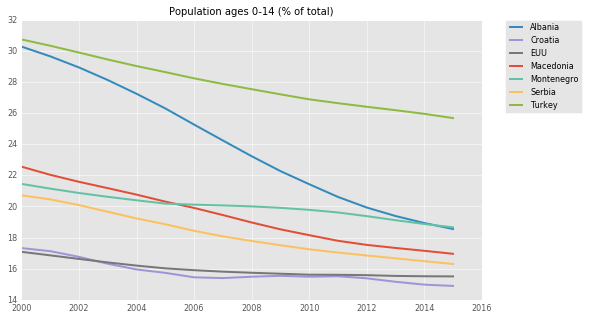

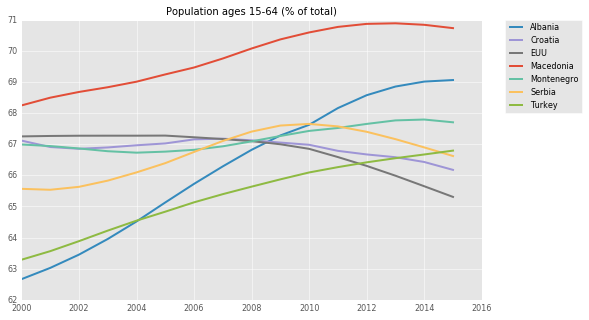

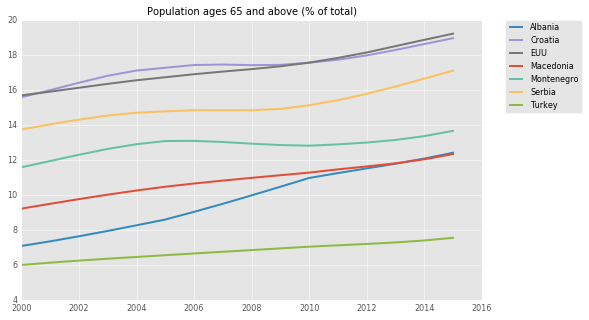

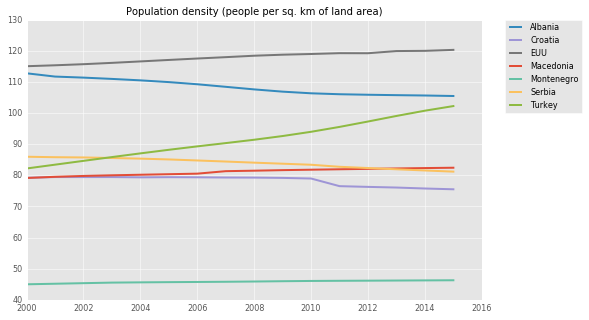

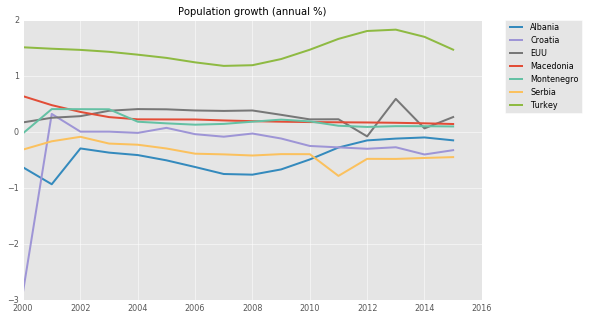

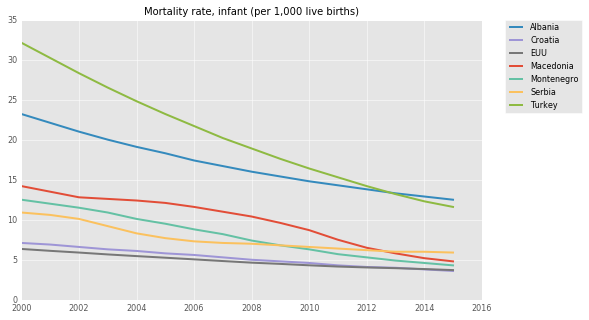

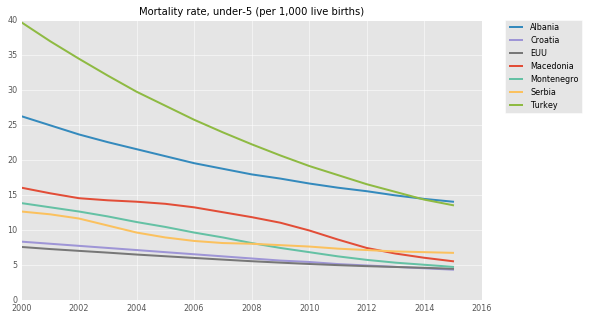

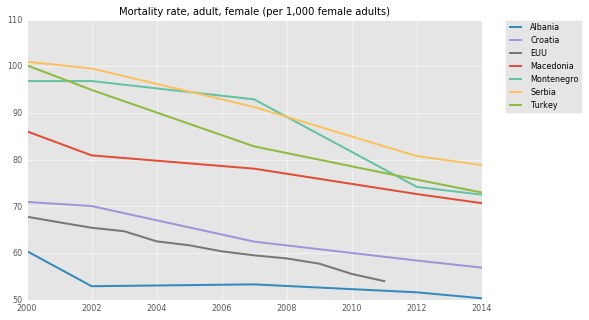

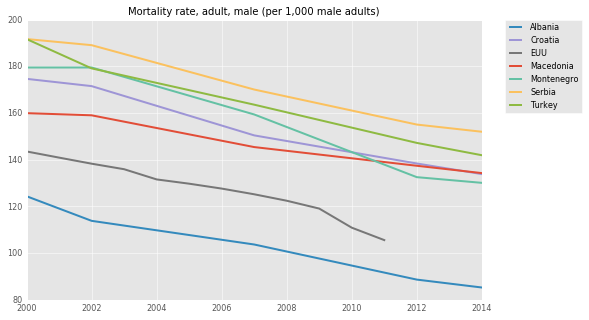

In [10]:
population = ['SP.DYN.LE00.IN',    #Life expectancy at birth, total (years)
              'SP.POP.0014.TO.ZS', #Population ages 0-14 (% of total)
              'SP.POP.1564.TO.ZS', #Population ages 15-64 (% of total)
              'SP.POP.65UP.TO.ZS', #Population ages 65 and above (% of total)
              'EN.POP.DNST',       #Population density (people per sq. km of land area)
              'SP.POP.GROW',       #Population growth (annual %)
              'SP.DYN.IMRT.IN',    #Mortality rate, infant (per 1,000 live births)
              'SH.DYN.MORT',       #Mortality rate, under-5 (per 1,000 live births)
              'SP.DYN.AMRT.FE',    #Mortality rate, adult, female (per 1,000 female adults)
              'SP.DYN.AMRT.MA'     #Mortality rate, adult, male (per 1,000 male adults)
             ]
plot_ind(population)

Life expectancy at birth is in increasing for all nationalities. EU average is eighty years, while all other states have lower standard. When it comes about age range, Turkey, Albania and Montenegro have the greatest percent of children among other lands while Macedonia has huge percent of citizens who are old between fifteen and sixtyfour years. People from EU and Croatia are  the oldest nationalites but increasing in this field is obvious for all states. Turkey is the only region with rising in population especially in last few years. On the other hand, Serbia and Croatia are lowest percent in population growth. Mortality rate in infancy and for children under five years are in falling off for all societies but Alabania and Turkey need a lot of improvements in this field. Similar situation is for mortality rates for adults, both female and male. Serbia and Turkey have the poorest score. 

# # Unemployment

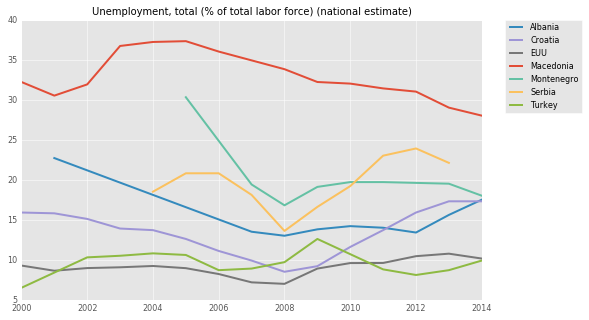

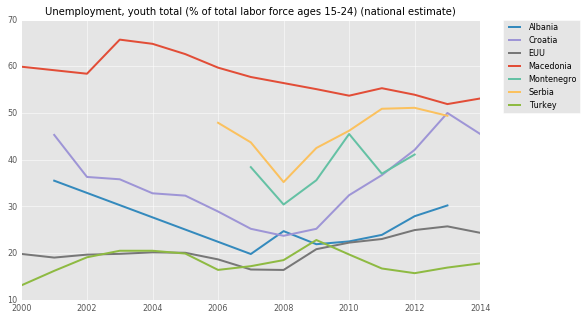

In [11]:
unemployment = ['SL.UEM.TOTL.NE.ZS', #Unemployment, total (% of total labor force) (national estimate)
                'SL.UEM.1524.NE.ZS'  #Unemployment, youth total (% of total labor force ages 15-24) (national estimate)
               ]
plot_ind(unemployment)

Unemployment is in growth during last few years in all states but percent of employed citizens is the lowest in Macedonia. Youth employment in Macedonia, Serbia and Croatia is also far away from EU youth employment. Surprisingly, young people in Turkey have better chances to find a job than in EU.

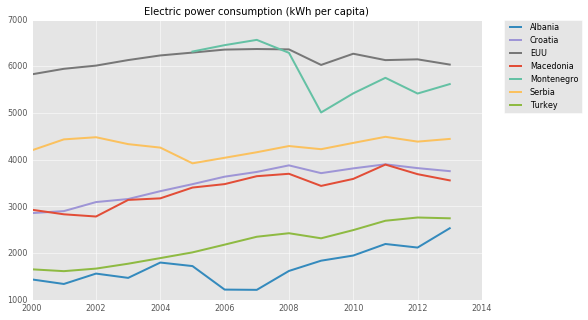

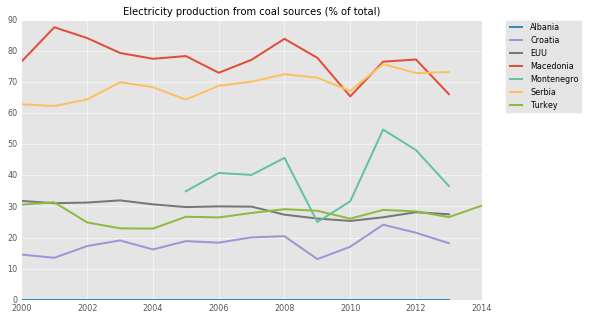

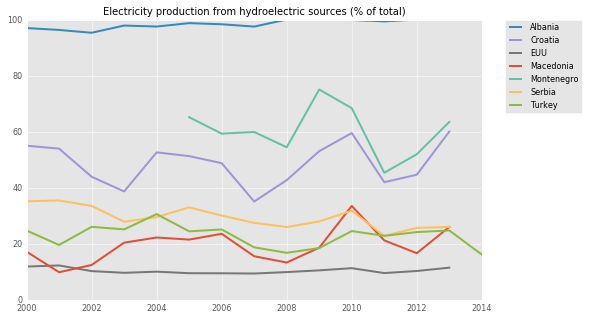

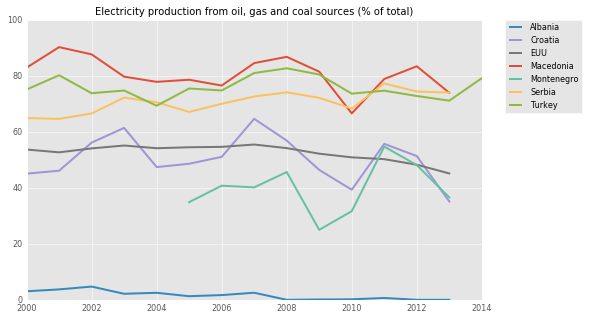

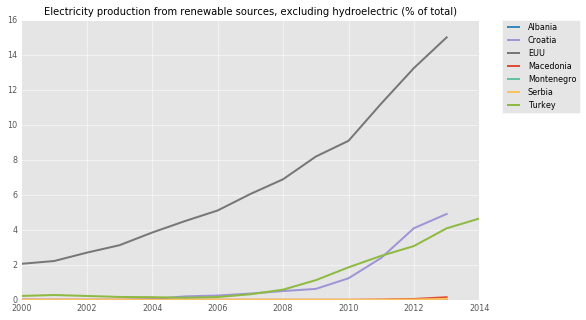

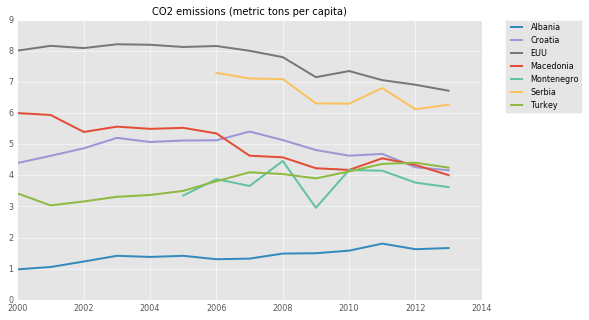

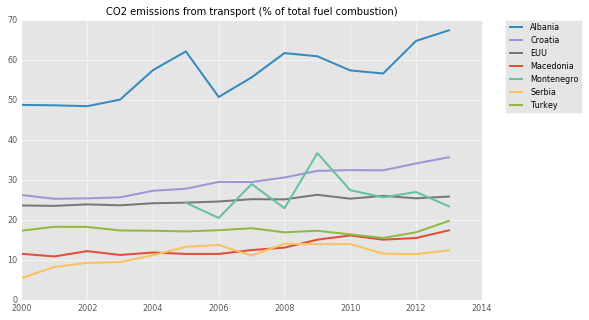

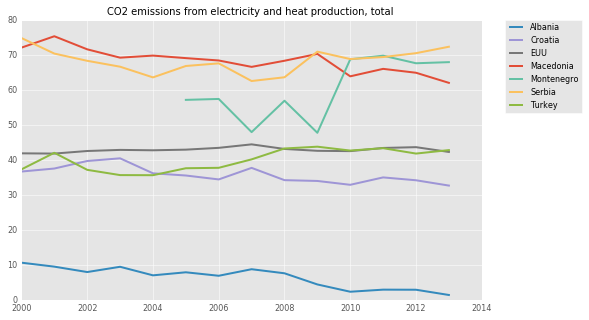

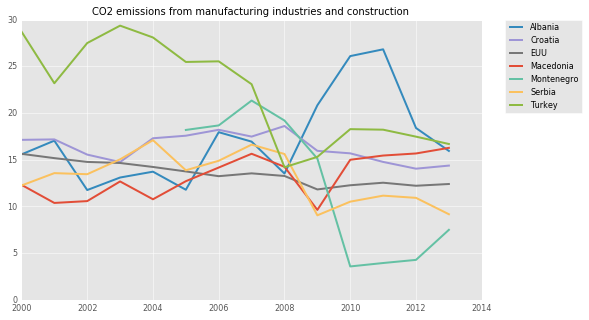

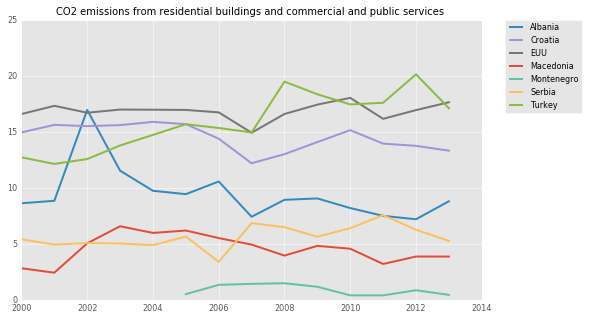

In [12]:
electric_power = ['EG.USE.ELEC.KH.PC', #Electric power consumption (kWh per capita)
                  'EG.ELC.COAL.ZS',    #Electricity production from coal sources (% of total)
                  'EG.ELC.HYRO.ZS',    #Electricity production from hydroelectric sources (% of total)
                  'EG.ELC.FOSL.ZS',    #Electricity production from oil, gas and coal sources (% of total)
                  'EG.ELC.RNWX.ZS',    #Electricity production from renewable sources, excluding hydroelectric (% of total)
                 ]
plot_ind(electric_power)

co2_emissions = ['EN.ATM.CO2E.PC', #CO2 emissions (metric tons per capita)
                 'EN.CO2.TRAN.ZS', #CO2 emissions from transport (% of total fuel combustion)
                 'EN.CO2.ETOT.ZS', #CO2 emissions from electricity and heat production, total (% of total fuel combustion)
                 'EN.CO2.MANF.ZS', #CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
                 'EN.CO2.BLDG.ZS', #CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)
                ]
plot_ind(co2_emissions)

In [ ]:
bussines = ['NY.GDP.MKTP.KD.ZG', #GDP growth (annual %)
            'NY.GDP.PCAP.CD',    #GDP per capita (current US$)
            'IC.REG.PROC',       #Start-up procedures to register a business (number)
            'IC.EXP.DURS',       #Time to export (days)
            'IC.IMP.DURS'        #Time to import (days)
           ]
plot_ind(bussines)

agriculture = ['AG.PRD.FOOD.XD',    #Food production index (2004-2006 = 100)
               'AG.PRD.LVSK.XD',    #Livestock production index (2004-2006 = 100)
               'AG.CON.FERT.ZS',    #Fertilizer consumption (kilograms per hectare of arable land)
               'AG.CON.FERT.PT.ZS', #Fertilizer consumption (% of fertilizer production)
               'AG.YLD.CREL.KG'     #Cereal yield (kg per hectare)
              ]
plot_ind(agriculture)

it = ['IT.NET.USER.P2', #Internet users (per 100 people)
      'IT.CEL.SETS.P2'  #Mobile cellular subscriptions
     ]
plot_ind(it) 

In [ ]:
net_aid = ['DC.DAC.AUTL.CD', #Net bilateral aid flows from DAC donors, Austria (current US$)
           'DC.DAC.BELL.CD', #Net bilateral aid flows from DAC donors, Belgium (current US$)
           'DC.DAC.CANL.CD', #Net bilateral aid flows from DAC donors, Canada (current US$)
           'DC.DAC.CZEL.CD', #Net bilateral aid flows from DAC donors, Czech Republic (current US$)
           'DC.DAC.DNKL.CD', #Net bilateral aid flows from DAC donors, Denmark (current US$)
           'DC.DAC.FINL.CD', #Net bilateral aid flows from DAC donors, Finland (current US$)
           'DC.DAC.FRAL.CD', #Net bilateral aid flows from DAC donors, France (current US$)
           'DC.DAC.DEUL.CD', #Net bilateral aid flows from DAC donors, Germany (current US$)
           'DC.DAC.GRCL.CD', #Net bilateral aid flows from DAC donors, Greece (current US$)
           'DC.DAC.IRLL.CD', #Net bilateral aid flows from DAC donors, Ireland (current US$)
           'DC.DAC.ITAL.CD', #Net bilateral aid flows from DAC donors, Italy (current US$)
           'DC.DAC.JPNL.CD', #Net bilateral aid flows from DAC donors, Japan (current US$)
           'DC.DAC.KORL.CD', #Net bilateral aid flows from DAC donors, Korea (current US$)
           'DC.DAC.LUXL.CD', #Net bilateral aid flows from DAC donors, Luxembourg (current US$)
           'DC.DAC.NLDL.CD', #Net bilateral aid flows from DAC donors, Netherlands (current US$)
           'DC.DAC.NORL.CD', #Net bilateral aid flows from DAC donors, Norway (current US$)
           'DC.DAC.SVKL.CD', #Net bilateral aid flows from DAC donors, Slovak Republic (current US$)
           'DC.DAC.SVNL.CD', #Net bilateral aid flows from DAC donors, Slovenia (current US$)
           'DC.DAC.ESPL.CD', #Net bilateral aid flows from DAC donors, Spain (current US$)
           'DC.DAC.SWEL.CD', #Net bilateral aid flows from DAC donors, Sweden (current US$)
           'DC.DAC.CHEL.CD', #Net bilateral aid flows from DAC donors, Switzerland (current US$)
           'DC.DAC.GBRL.CD', #Net bilateral aid flows from DAC donors, United Kingdom (current US$)
           'DC.DAC.USAL.CD', #Net bilateral aid flows from DAC donors, United States (current US$)
           'DC.DAC.TOTL.CD'  #Net bilateral aid flows from DAC donors, Total (current US$)   
          ]

plot_aid(net_aid)  

In [ ]:
ind =['SG.VAW.BURN.ZS',
      'SG.VAW.GOES.ZS',
      'SG.VAW.NEGL.ZS',
      'SG.VAW.REFU.ZS',
      'SG.VAW.ARGU.ZS'
     ]

def women(indicators):
    
    df_filtered = df2.loc[(df2.CountryName != 'EUU') | (df2.CountryName != 'Croatia')]
    
    for indicator in indicators:
        fig, ax = plt.subplots()
        ind_women = df_filtered.loc[df_filtered.IndicatorCode == indicator]
        l = 0
        bar_width = 0.2
        h = 1.08
        ha = 'left'
        year = []
        countries = {}
        for i in range(len(ind_women.Value)):
            country = ind_women.iloc[i].CountryName
            c = colors[country]
            #countries[country1] = 0
            ax.bar(l, ind_women.iloc[i].Value, width=bar_width, color=c, label=country)
            year.append(l)
            plt.xticks(range(len(year)), ind_women.Year.unique(), horizontalalignment=ha, rotation=45)
            plt.title(ind_women.iloc[0].IndicatorName)
            if i < len(ind_women.Value)-1:
                if ind_women.iloc[i].Year == ind_women.iloc[i+1].Year:
                    l -= bar_width
                    ha = 'right'
                else:
                    l += h
                    ha = 'center'
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
        plt.show()

women(ind)